In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from PIL import Image
import shutil

Stitching Functions

In [2]:
def merge_images_h(file1, file2):
    """Merge two images into one, displayed side by side
    :param file1: path to first image file
    :param file2: path to second image file
    :return: the merged Image object
    """
    try:
        image1 = Image.open(file1)
    except:
        image1 = file1
    image2 = Image.open(file2)

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = width1 + width2
    result_height = max(height1, height2)

    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image1, box=(0, 0))
    result.paste(im=image2, box=(width1, 0))

    return result

def merge_images_v(file1, file2):
    """Merge two images into one, displayed side by side
    :param file1: path to first image file
    :param file2: path to second image file
    :return: the merged Image object
    """
    try:
        image1 = Image.open(file1)
    except:
        image1 = file1
    image2 = Image.open(file2)

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = max(width1,width2)
    result_height = height1+height2

    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image1, box=(0, 0))
    result.paste(im=image2, box=(0, height1))

    return result



In [3]:
def plotter(temp_dir, output_name):
    plots = os.listdir(temp_dir)

    new_row = True
    image = None

    x = 0

    while new_row:
        new_column = True
        y = 0

        image_h = None
        while new_column:

            file = str(x) + '_' + str(y) + '.png'
            filepath = temp_dir + file

            if image_h:
                if file in plots:
                    image_h = merge_images_h(image_h,filepath)
                else:
                    new_column = False
            elif file in plots:
                image_h = Image.open(filepath)
            else:
                new_row = False
                break

            mid_path = temp_dir + str(x)+'.png'
            image_h.save(mid_path) 

            y += 1

        if image:
            image = merge_images_v(image,mid_path)     
        else:
            image = image_h

        x += 1

    image.save(output_name)
    shutil.rmtree(temp_dir)    

Normalized Loadshapes

In [4]:
normal_loads = pd.read_csv('normal_loadshapes.csv')

In [5]:
normal_loads.head(5)

,time,target,daytype,Heating,Cooling,Ventilation,WaterHeating,Cooking,Refrigeration,ExteriorLighting,InteriorLighting,Electronics,Appliances,Miscellaneous,Vehicle
0,0,"Abilene,TX",winter_peak,0.028034,0.001339,0.103399,0.003375,0.001207,0.018814,0.001204,0.021089,0.022502,0.027835,0.031767,0.001204
1,1,"Abilene,TX",winter_peak,0.198899,0.001524,0.195403,0.007133,0.001256,0.036484,0.001204,0.040376,0.042691,0.055512,0.064161,0.001204
2,2,"Abilene,TX",winter_peak,0.191466,0.001579,0.184505,0.006739,0.001226,0.037578,0.001204,0.039549,0.043039,0.058923,0.060698,0.001204
3,3,"Abilene,TX",winter_peak,0.180705,0.001597,0.167592,0.005703,0.001222,0.037505,0.001204,0.038866,0.042784,0.049840,0.061165,0.001204
4,4,"Abilene,TX",winter_peak,0.187559,0.001605,0.158683,0.005851,0.001218,0.037348,0.001204,0.038128,0.042967,0.051176,0.060864,0.001204


In [ ]:
base_enduses = list(normal_loads.columns)
base_enduses.remove('time')
base_enduses.remove('target')
base_enduses.remove('daytype')
base_enduses.remove('Heating')
base_enduses.remove('Cooling')

temp_dir = 'temp_plotdir/'
os.mkdir(temp_dir)

ticks = np.arange(0, 25, 3) 

for idx, city in enumerate(normal_loads.target.unique()):
    city_df = normal_loads.loc[normal_loads.target == city]
    
    for ydx, daytype in enumerate(city_df.daytype.unique()):
        title = str(city)+'-'+str(daytype)
        day_df = city_df.loc[city_df.daytype == daytype]
        day_df = day_df.reset_index()
        day_df['Baseload'] = day_df[base_enduses].sum(axis=1)
        plot = day_df[['Heating','Cooling','Baseload']].plot(kind='area', title=title, grid=True, xticks=ticks, ylim=(0, 1), linewidth=2, color=['red','blue','black'])
        fig = plot.get_figure()
        fig.savefig(temp_dir+str(idx)+'_'+str(ydx)+'.png')

output_name = 'normalized_loadshapes.png'
plotter(temp_dir, output_name)

/Users/gismo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

Loadshapes

In [7]:
loadshapes = pd.read_csv('loadshapes.csv', index_col = 0)

In [8]:
loadshapes.head(5)

,zipcode,Heating,Cooling,Ventilation,WaterHeating,Cooking,Refrigeration,ExteriorLighting,InteriorLighting,Electronics,Appliances,Miscellaneous,Vehicle
0,981,-0.032912,-1.581224e-17,0.009061,0.020525,0.000083,0.002013,0.000013,0.002120,0.002736,0.002938,0.001887,0.0
1,981,-0.056514,-1.261754e-17,0.005771,0.010622,0.000041,0.001951,0.000013,0.001172,0.002228,0.001679,0.001838,0.0
2,981,-0.066829,-2.882849e-17,0.005080,0.008665,0.000018,0.001864,0.000013,0.000663,0.002002,0.001210,0.001923,0.0
3,981,-0.070688,-4.035658e-18,0.004403,0.007166,0.000017,0.001820,0.000013,0.000484,0.001942,0.001058,0.001843,0.0
4,981,-0.061162,-7.676461e-18,0.004683,0.017723,0.000017,0.001833,0.000013,0.000504,0.001858,0.001085,0.001929,0.0


/Users/gismo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/gismo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


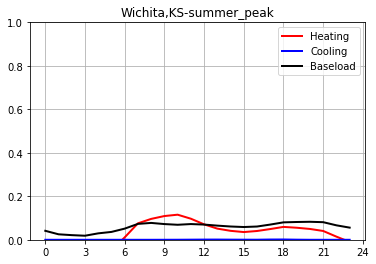

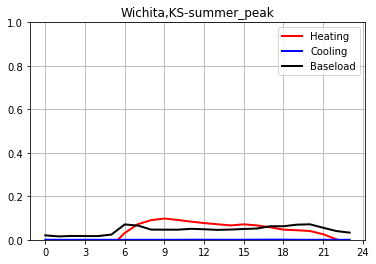

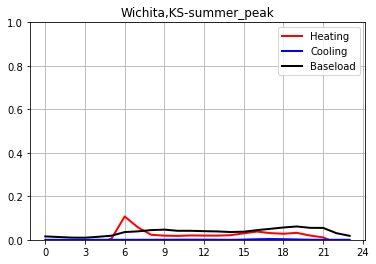

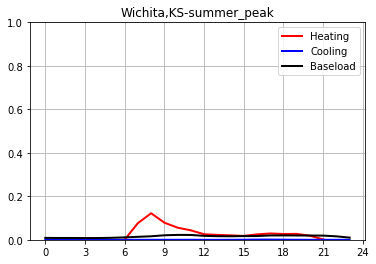

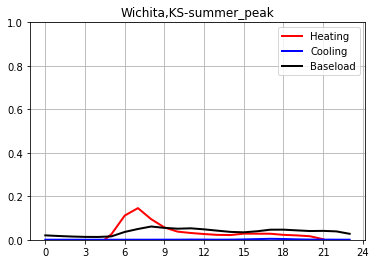

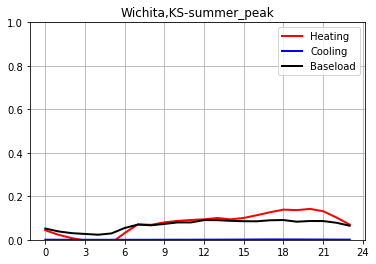

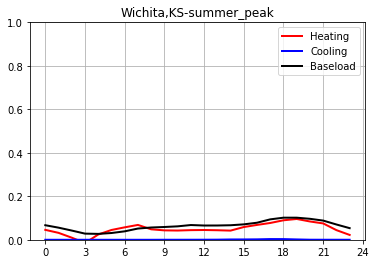

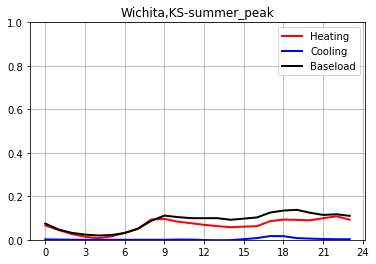

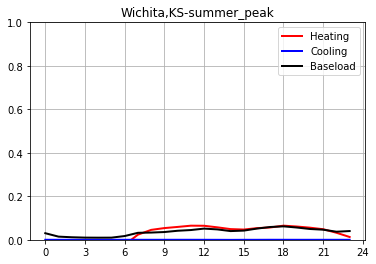

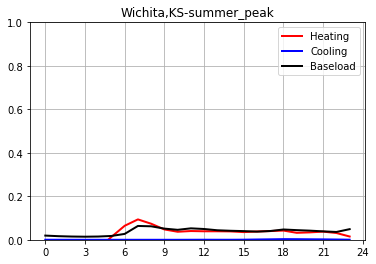

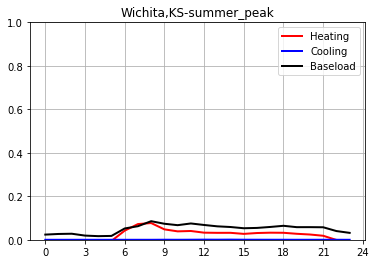

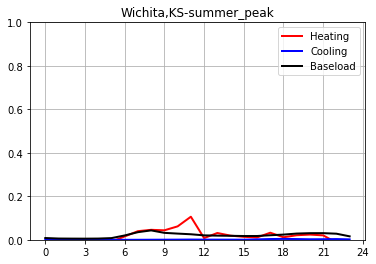

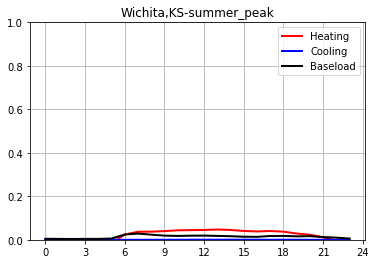

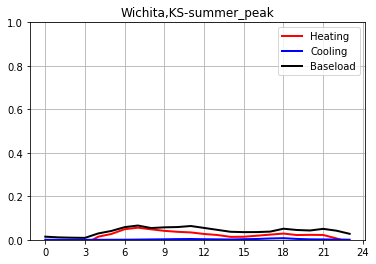

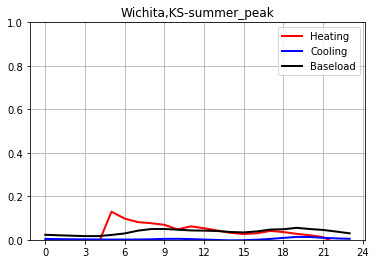

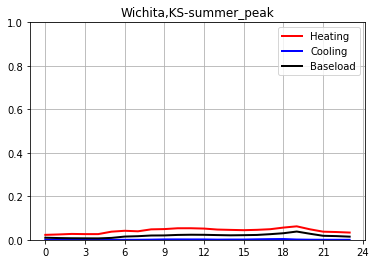

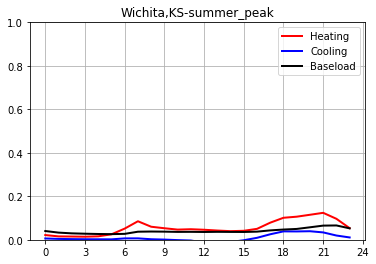

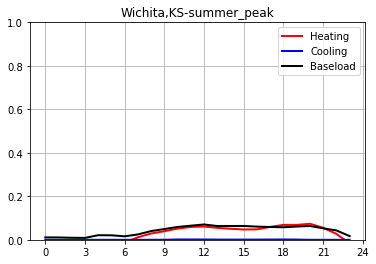

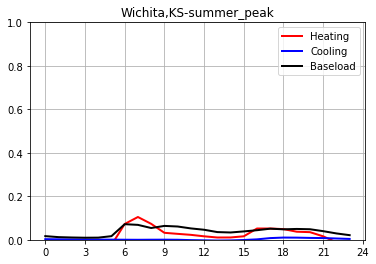

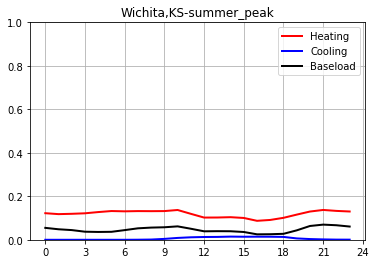

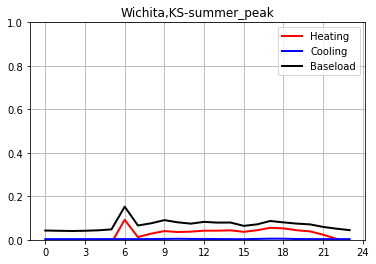

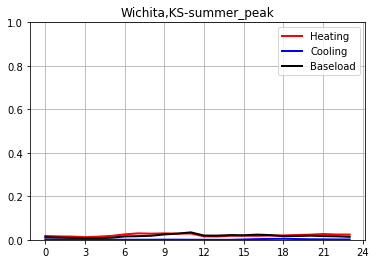

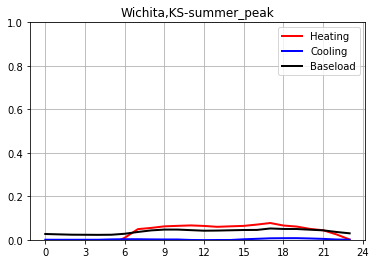

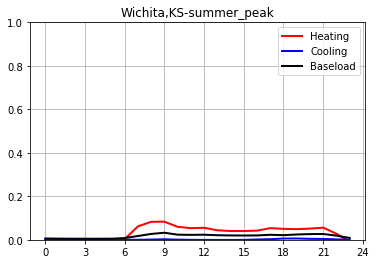

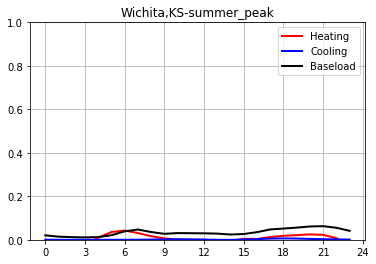

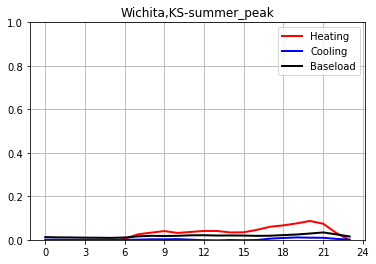

In [9]:
base_enduses = list(loadshapes.columns)
base_enduses.remove('zipcode')
base_enduses.remove('Heating')
base_enduses.remove('Cooling')

temp_dir = 'temp_plotdir/'
os.mkdir(temp_dir)

ticks = np.arange(0, 25, 3) 

for idx, zipcode in enumerate(loadshapes.zipcode.unique()):
    zipcode_df = loadshapes.loc[loadshapes.zipcode == zipcode]
    zipcode_df['Baseload'] = zipcode_df[base_enduses].sum(axis=1)
    zipcode_df = zipcode_df.head(24)
    plot = zipcode_df[['Heating','Cooling','Baseload']].plot(title=title, grid=True, xticks=ticks, ylim=(0, 1), linewidth=2, color=['red','blue','black'])
    fig = plot.get_figure()
    fig.savefig(temp_dir+str(idx)+'_'+str(0)+'.png')

output_name = 'loadshapes.png'
plotter(temp_dir, output_name)

Total Loadshapes

In [10]:
total_loadshapes = pd.read_csv('total_loadshapes.csv', index_col=0)

In [11]:
total_loadshapes.head(5)

,target,time,daytype,Heating,Cooling,Ventilation,WaterHeating,Cooking,Refrigeration,ExteriorLighting,InteriorLighting,Electronics,Appliances,Miscellaneous,Vehicle
0,"Abilene,TX",0,winter_peak,0.065998,0.000022,0.016591,0.018772,0.000718,0.002859,0.0,0.003228,0.003458,0.004323,0.004962,0.0
1,"Abilene,TX",1,winter_peak,0.179151,0.000052,0.031528,0.031025,0.002908,0.005728,0.0,0.006359,0.006735,0.008817,0.010221,0.0
2,"Abilene,TX",2,winter_peak,0.175751,0.000061,0.029758,0.029978,0.001900,0.005905,0.0,0.006225,0.006792,0.009371,0.009659,0.0
3,"Abilene,TX",3,winter_peak,0.170708,0.000064,0.027013,0.027027,0.001705,0.005893,0.0,0.006114,0.006750,0.007896,0.009735,0.0
4,"Abilene,TX",4,winter_peak,0.173937,0.000065,0.025566,0.027467,0.001525,0.005868,0.0,0.005995,0.006780,0.008113,0.009686,0.0


/Users/gismo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


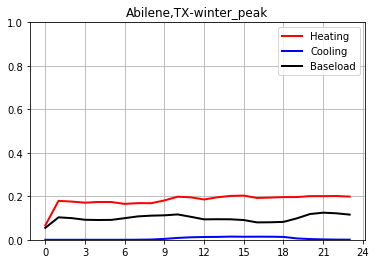

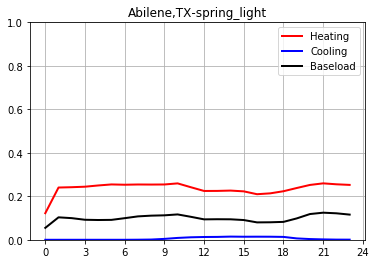

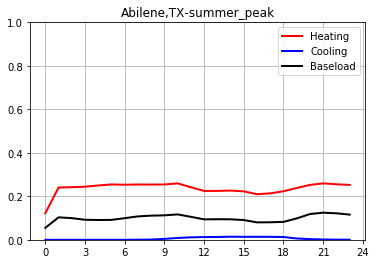

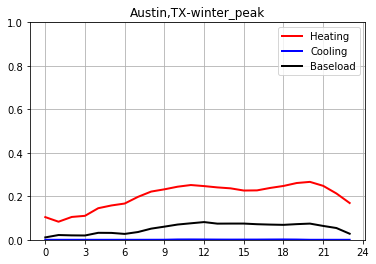

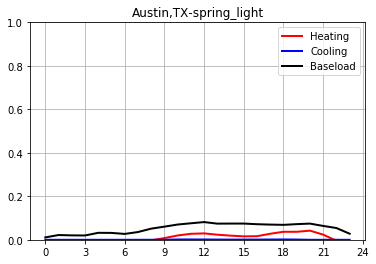

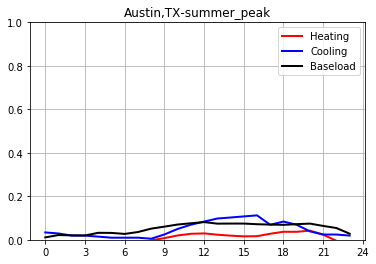

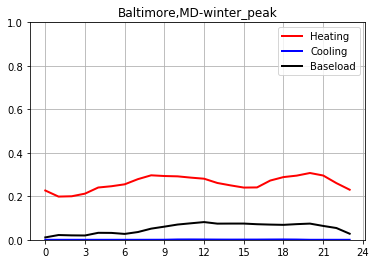

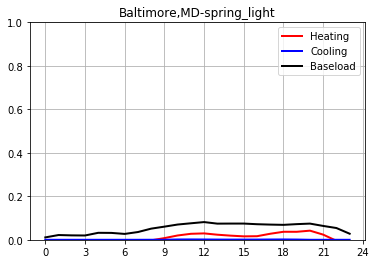

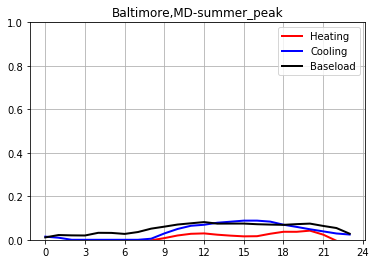

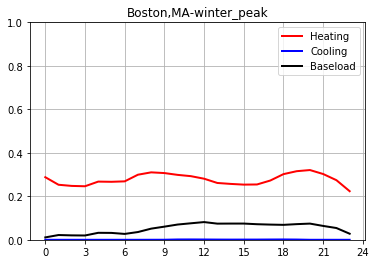

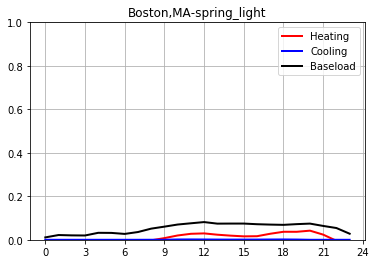

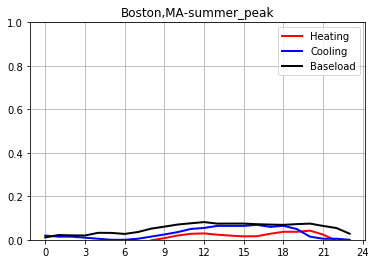

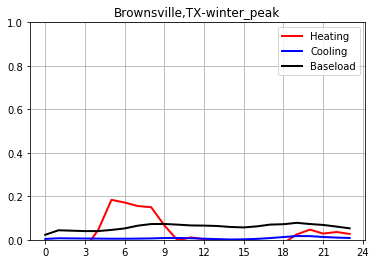

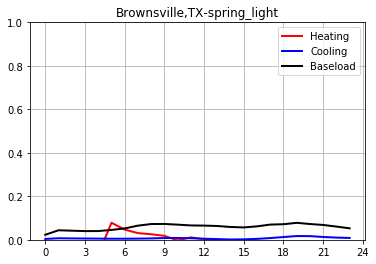

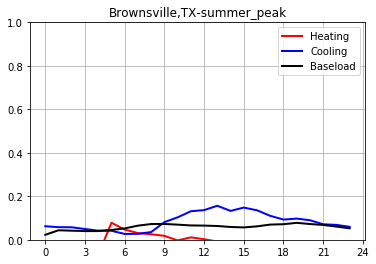

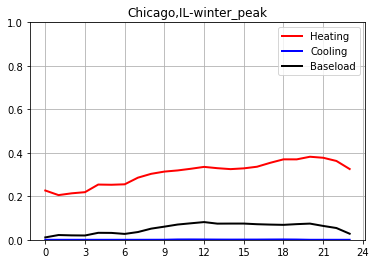

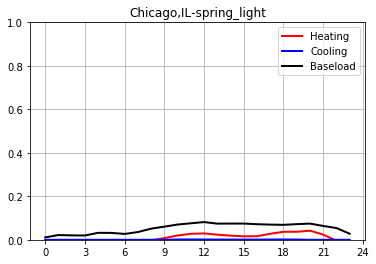

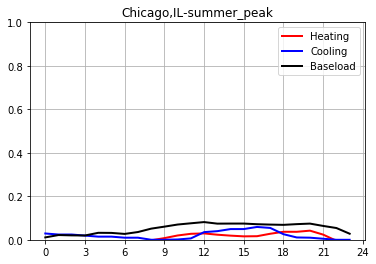

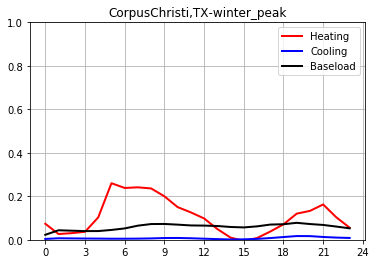

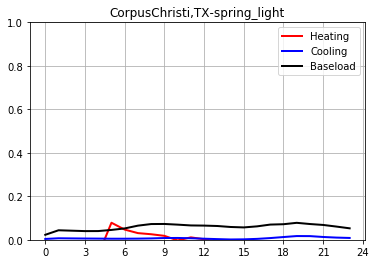

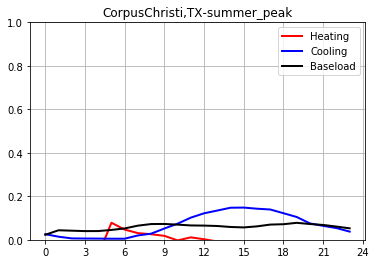

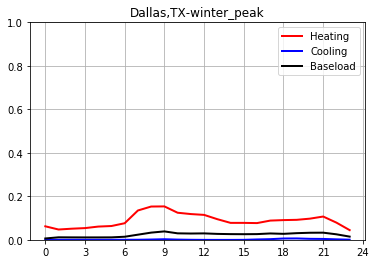

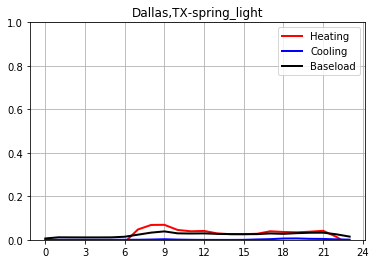

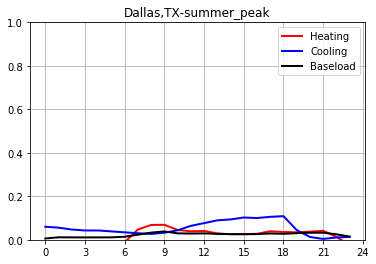

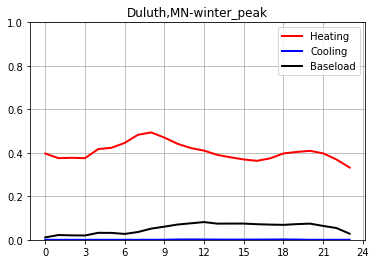

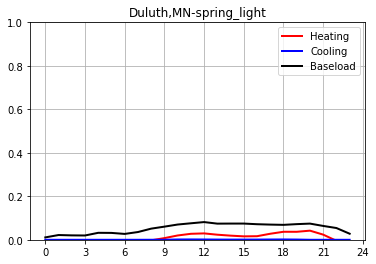

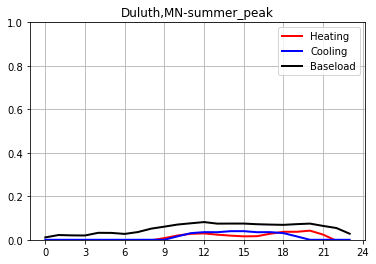

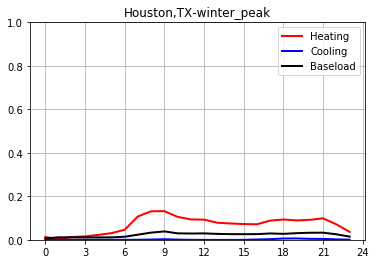

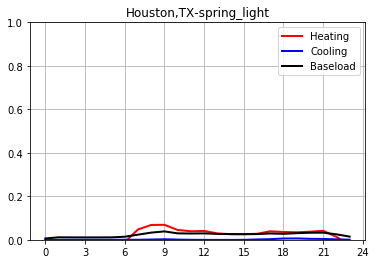

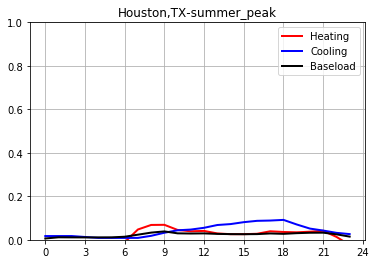

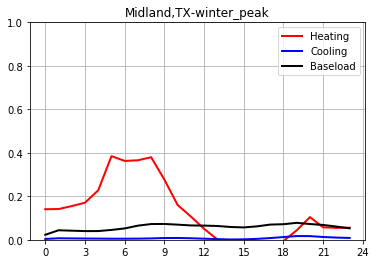

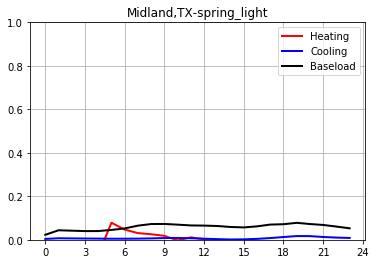

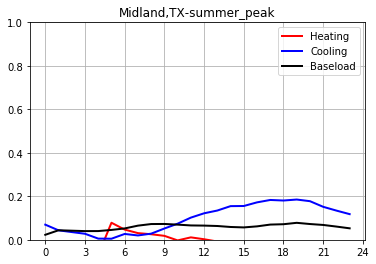

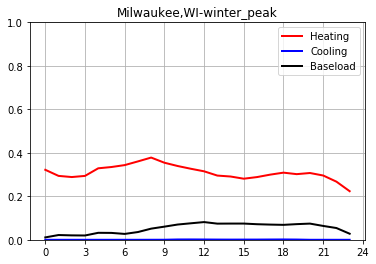

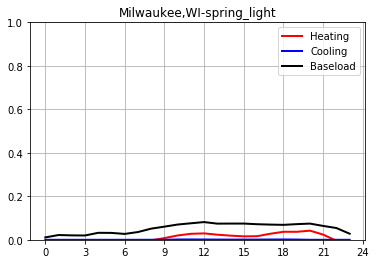

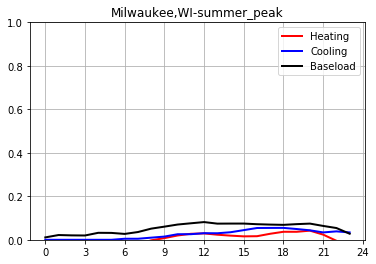

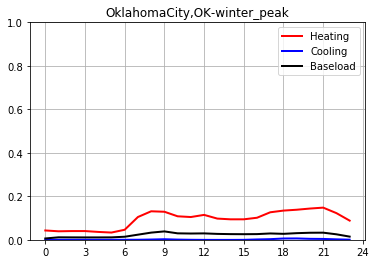

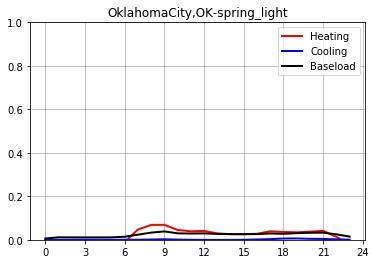

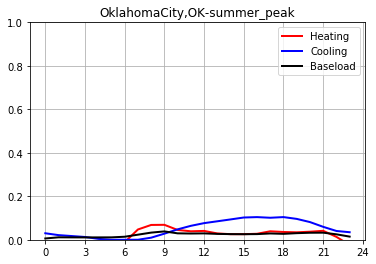

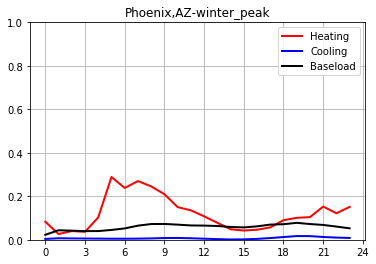

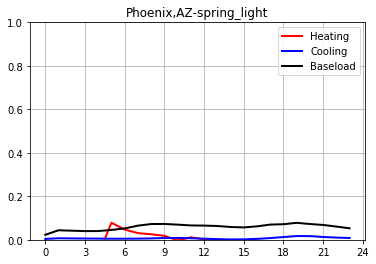

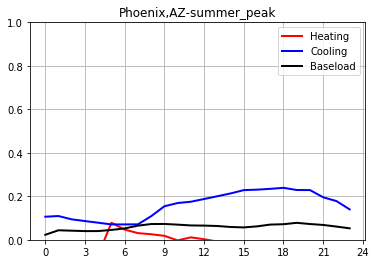

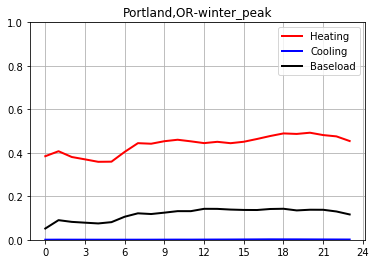

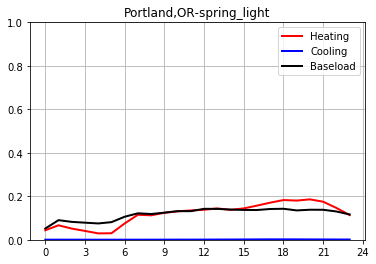

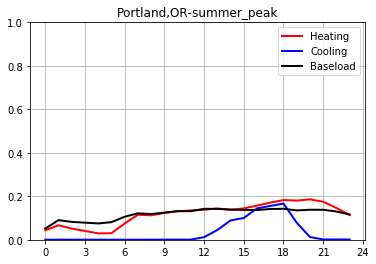

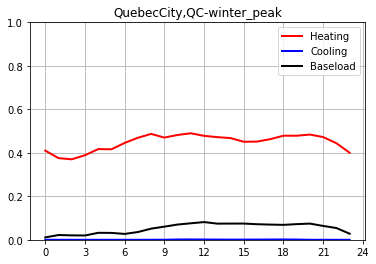

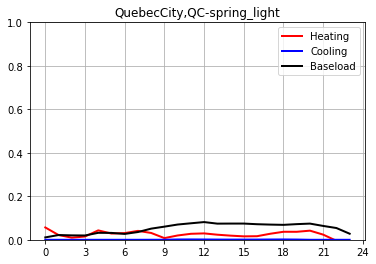

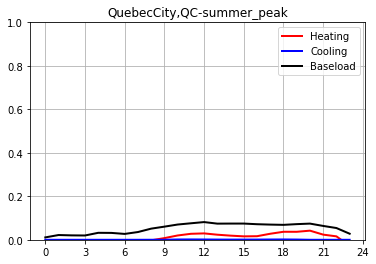

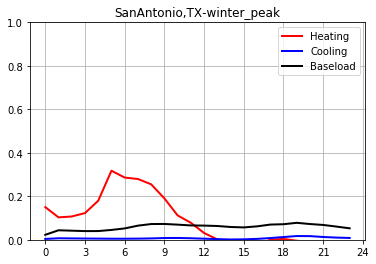

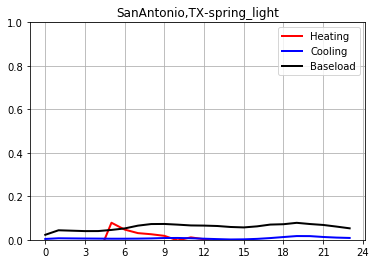

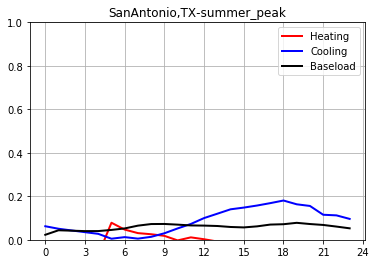

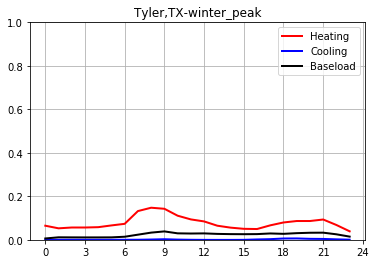

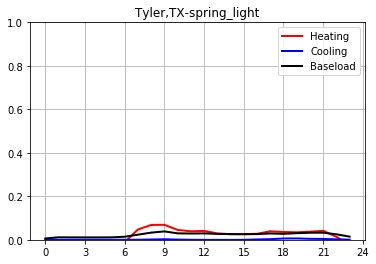

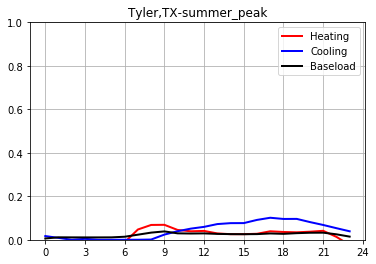

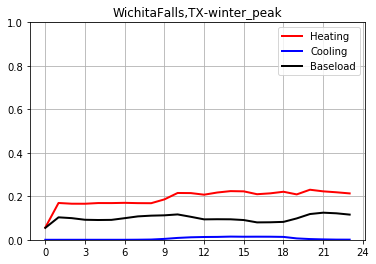

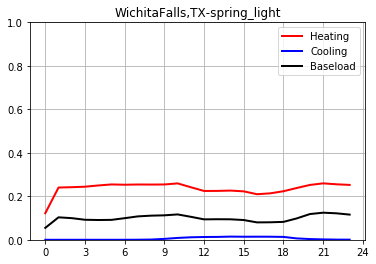

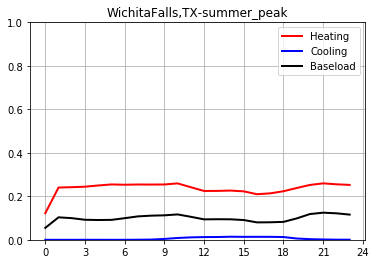

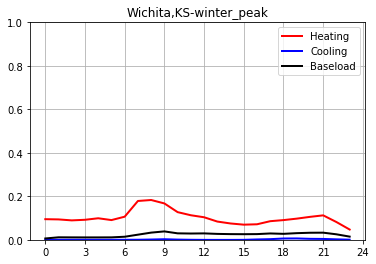

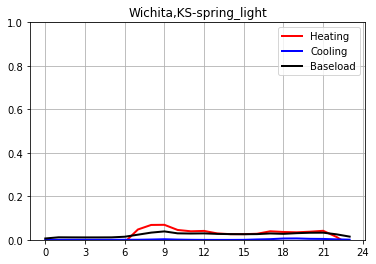

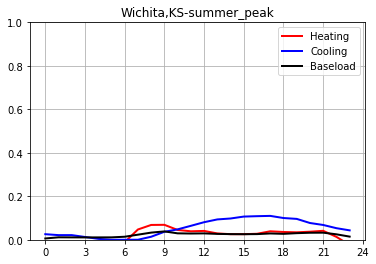

In [12]:
base_enduses = list(total_loadshapes.columns)
base_enduses.remove('time')
base_enduses.remove('target')
base_enduses.remove('daytype')
base_enduses.remove('Heating')
base_enduses.remove('Cooling')

temp_dir = 'temp_plotdir/'
os.mkdir(temp_dir)

ticks = np.arange(0, 25, 3) 

for idx, city in enumerate(total_loadshapes.target.unique()):
    city_df = total_loadshapes.loc[total_loadshapes.target == city]
    
    for ydx, daytype in enumerate(city_df.daytype.unique()):
        title = str(city)+'-'+str(daytype)
        day_df = city_df.loc[city_df.daytype == daytype]
        day_df = day_df.reset_index()
        day_df['Baseload'] = day_df[base_enduses].sum(axis=1)
        plot = day_df[['Heating','Cooling','Baseload']].plot(title=title, grid=True, xticks=ticks, ylim=(0, 1), linewidth=2, color=['red','blue','black'])
        fig = plot.get_figure()
        fig.savefig(temp_dir+str(idx)+'_'+str(ydx)+'.png')

output_name = 'total_loadshapes.png'
plotter(temp_dir, output_name)

In [13]:
df = pd.read_csv('rbsa_cleandata.csv')
for column in df.columns[2:]:
    print(column)
    print(df.loc[df[column] < 0].siteid.unique())

Heating
[]
Cooling
[22222]
Ventilation
[]
HeatCool
[13248]
WaterHeating
[]
Cooking
[]
Refrigeration
[]
ExteriorLighting
[]
InteriorLighting
[]
Electronics
[]
Appliances
[]
Miscellaneous
[]
Vehicle
[]


check for negative values at different points

In [14]:
df = pd.read_csv('area_loads.csv')
sum(n < 0 for n in df[df.columns[2:]].values.flatten())

184

In [15]:
df = pd.read_csv('area_loads.csv')

for column in df.columns[2:]:
    print(column)
    print(df.loc[df[column] < 0].head(10))

Heating
Empty DataFrame
Columns: [time, zipcode, Heating, Cooling, Ventilation, HeatCool, WaterHeating, Cooking, Refrigeration, ExteriorLighting, InteriorLighting, Electronics, Appliances, Miscellaneous, Vehicle]
Index: []
Cooling
                       time  zipcode   Heating   Cooling  Ventilation  \
402159  2012-04-02 09:00:00      990  0.957961 -0.042830          0.0   
402166  2012-04-02 16:00:00      990  0.872146 -0.002008          0.0   
402169  2012-04-02 19:00:00      990  0.901556 -0.001969          0.0   
402180  2012-04-03 06:00:00      990  0.902265 -0.011974          0.0   
402193  2012-04-03 19:00:00      990  0.880070 -0.014080          0.0   
402194  2012-04-03 20:00:00      990  0.819359 -0.001989          0.0   
402216  2012-04-04 18:00:00      990  1.104164 -0.096302          0.0   
402229  2012-04-05 07:00:00      990  0.952504 -0.014127          0.0   
402323  2012-04-09 05:00:00      990  0.786200 -0.067714          0.0   
402338  2012-04-09 20:00:00      990  0

In [16]:
df = pd.read_csv('enduse_loads.csv')
sum(n < 0 for n in df[df.columns[2:]].values.flatten())

172

In [17]:
df = pd.read_csv('total_loads.csv')
sum(n < 0 for n in df[df.columns[3:]].values.flatten())

172

In [18]:
df = pd.read_csv('normal_loads.csv')
sum(n < 0 for n in df[df.columns[3:]].values.flatten())

0